In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
# we want to make sure our training set has the same amount of images as it has labels 
print(y_train.shape[0])
# as seen, we have 60000 labels for 60000 images 

(60000, 28, 28)
(10000, 28, 28)
60000


In [ ]:
# assert; it takes a single argument ,True of False, if the condition is met then the code will run smoothly with no issues,   
# if the condition is not met, the code will stop running and notify the user that something went wrong 
# this function helps u to debug ur code 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

In [ ]:
# now we will visulize our data 
num_of_samples = []

# make grid
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()



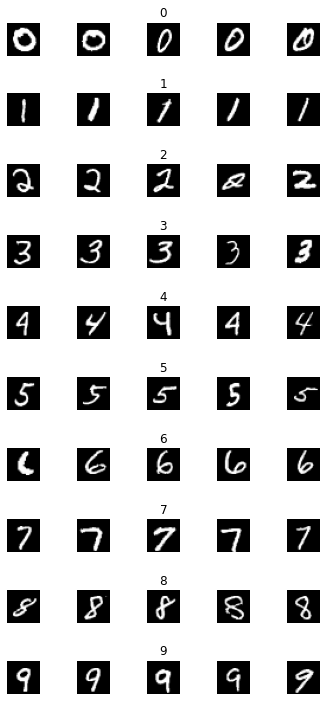

In [ ]:
# what we will do loop through every single column and for each column itteration we wil itterate through every row (every class)
# we will use nested for loops arrangment 
# we will repeat the grid 
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
  for j in range (num_classes):
    # we have to define an array that will filter out images that dont belong to the class
    x_selected = X_train[y_train == j] # it will only keep the images will label J
    # we want to reach our x_selected array and print a randomly selected image which corresponds
    # to the current itteration (current class)
    # and since we are using training data to populate x_selected which has dimension of (60000,28,28)
    # then x_selected will have the exact same dimesnion so for each j we want to access a random image from x_selected[0]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray")) # notice we chose grayscale color map
    # we want to turn off the axes values 
    axs[j][i].axis("off")
    # now we want to use labels:
    if i == 2:
      axs[j][i].set_title(str(j))
      # so far we are shoing 5 samples of each class but there are thousands of them 
      num_of_samples.append(len(x_selected))
    


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

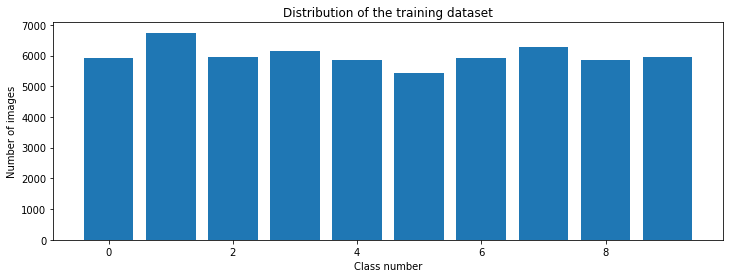

In [ ]:
print(num_of_samples) # this will show you the amount of images that belong to each class
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
# now we will prepare our data so we can use to train our network
# first : one_hot encoding 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# next step is to normalize our data 
# normalizing : from 0 to 255 >>>> make it from 0 to 1 
X_train = X_train/255
X_test = X_test/255

# now we want to flatten our images 
# we currently have images that is 2D array 28x28 (784 pixels in total)
# however due to the structure of our neural network our input values are going to be multiplied by 
# the weight matrix connecting our input layer with the 1st hidden layer 
# to conduct matrix multiplication we must make our images one dimensional array 
# so instead of 28x28 we will flatten our image into a single row with 784 pixels

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

print(X_train.shape)
print(X_test.shape)

# now that our data is propably formated  we can finally move on towards creating our neural network
# and use it to classify mnist images

(60000, 784)
(10000, 784)


In [ ]:
def creat_model():
  model = Sequential()
  model.add(Dense(10,input_dim=num_pixels, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = creat_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 1.2573 - accuracy: 0.5469 - val_loss: 0.7365 - val_accuracy: 0.7517
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.8156 - accuracy: 0.7308 - val_loss: 0.7242 - val_accuracy: 0.7672
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.7735 - accuracy: 0.7495 - val_loss: 0.7730 - val_accuracy: 0.7482
Epoch 4/10
270/270 [==============================] - 1s 2ms/step - loss: 0.7867 - accuracy: 0.7520 - val_loss: 0.7768 - val_accuracy: 0.7538
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.7882 - accuracy: 0.7547 - val_loss: 0.6918 - val_accuracy: 0.7882
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.7684 - accuracy: 0.7620 - val_loss: 0.7180 - val_accuracy: 0.7788
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.7658 - accuracy: 0.7572 - val_loss: 0.6895 - val_accuracy: 0.7988
Epoch 

Text(0.5, 0, 'epoch')

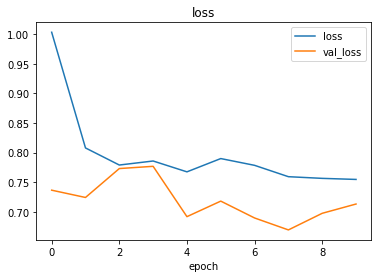

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

# notice that the validation loss is consistantly lower than the training loss which makes sense 
# when the validation loss is higher .. this means overfitting

In [ ]:
# now we will test our model and see how it performs with images that were not seen before

score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score: ', score[0])
print('Test Accuracy: ', score[1])


<class 'list'>
Test score:  0.758537769317627
Test Accuracy:  0.7594000101089478


In [ ]:
# we will try our model on an image from the web
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

In [ ]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
print(resized.shape) # notice we still have a depth of 4 
gray_scale = cv2.cvtColor (resized, cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)
# we want the image to have black background with white number 
image = cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap=plt.get_cmap("gray"))

In [ ]:
image = image/255
image = image.reshape(1,784)

In [ ]:
prediction = model.predict_classes(image)
print("predicted digit: ", str(prediction))

In [ ]:
# to make a more accurate model, we can change the model hyperparameters